In [1]:
import pandas as pd

# Create a larger dataset for the student performance scenario
data = {
    'Hours of Study': [10, 15, 8, 20, 25, 12, 18, 30, 5, 16,
                       22, 14, 19, 11, 21, 9, 17, 13, 24, 26,
                       28, 6, 27, 7, 4, 15, 20, 18, 10, 30,
                       12, 14, 19, 16, 22, 23, 11, 8, 5, 13,
                       9, 21, 15, 17, 20, 24, 26, 10, 14, 22],

    'Attendance Percentage': [85, 90, 78, 95, 88, 80, 92, 70, 60, 95,
                             88, 82, 75, 90, 94, 81, 89, 76, 80, 92,
                             85, 65, 90, 75, 60, 82, 88, 90, 77, 93,
                             91, 89, 84, 86, 92, 80, 78, 85, 70, 94,
                             95, 85, 90, 80, 92, 87, 86, 75, 90, 80],

    'Extracurricular Activities': [2, 3, 1, 4, 5, 2, 3, 0, 1, 4,
                                   2, 1, 3, 2, 4, 1, 0, 2, 3, 4,
                                   5, 3, 1, 2, 4, 3, 0, 2, 1, 5,
                                   3, 2, 4, 1, 2, 5, 0, 3, 4, 2,
                                   1, 0, 2, 3, 5, 4, 3, 1, 2, 4],

    'Parent\'s Education Level': [2, 3, 1, 3, 2, 1, 3, 2, 1, 2,
                                   3, 2, 1, 3, 2, 1, 3, 2, 1, 2,
                                   2, 3, 1, 3, 2, 1, 3, 2, 1, 2,
                                   3, 2, 1, 3, 2, 1, 3, 2, 1, 2,
                                   3, 2, 1, 3, 2, 1, 3, 2, 1, 2],

    'Final Grade': [75, 85, 60, 95, 80, 70, 90, 50, 40, 88,
                    77, 82, 66, 92, 91, 72, 65, 80, 89, 94,
                    68, 59, 85, 78, 55, 81, 88, 84, 75, 90,
                    73, 88, 67, 76, 79, 85, 80, 62, 60, 70,
                    78, 85, 91, 76, 87, 92, 90, 88, 72, 81]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save DataFrame to a CSV file
df.to_csv('student_performance.csv', index=False)

print("Dataset created and saved as 'student_performance.csv'")


Dataset created and saved as 'student_performance.csv'


   Hours of Study  Attendance Percentage  Extracurricular Activities  \
0              10                     85                           2   
1              15                     90                           3   
2               8                     78                           1   
3              20                     95                           4   
4              25                     88                           5   

   Parent's Education Level  Final Grade  
0                         2           75  
1                         3           85  
2                         1           60  
3                         3           95  
4                         2           80  
Mean Squared Error: 108.90680444560321
R-squared: -0.18004989105648717

Actual vs Predicted:
   Actual Final Grades  Predicted Final Grades
0                   92               82.934255
1                   70               86.700786
2                   73               84.904522
3                   92      

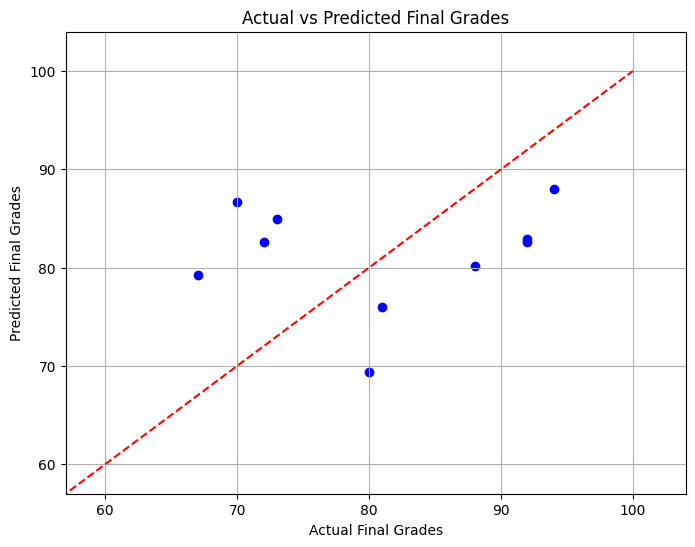

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('student_performance.csv')

# Display the first few rows of the dataset
print(df.head())

# Define features (X) and target variable (y)
X = df[['Hours of Study', 'Attendance Percentage', 'Extracurricular Activities', "Parent's Education Level"]]
y = df['Final Grade']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print actual and predicted values in two columns
results = pd.DataFrame({'Actual Final Grades': y_test.values, 'Predicted Final Grades': y_pred})
print("\nActual vs Predicted:")
print(results)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')
plt.title('Actual vs Predicted Final Grades')

# Draw the ideal line
plt.plot([0, 100], [0, 100], color='red', linestyle='--')

# Set limits to minimize empty space
plt.xlim(y_test.min() - 10, y_test.max() + 10)
plt.ylim(y_test.min() - 10, y_test.max() + 10)

plt.grid()
plt.show()
